# DS Phase 1 project -  Movie Analysis

###### Import moviegross,moviebudget,movieinfo,tmdb to examine the data info

In [4]:
import csv
import pandas as pd
import matplotlib.pyplot as plt 
import sqlite3
import seaborn as sns
import numpy as np
from matplotlib import font_manager

In [130]:
#import bom movie csv file as moviegross
moviegross=pd.read_csv("/Users/Shen/Documents/Flatiron/Project_1/dsc-phase-1-project-template/zippedData/bom.movie_gross.csv")
moviegross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [133]:
#import tn movie csv file
moviebudget=pd.read_csv("/Users/Shen/Documents/Flatiron/Project_1/dsc-phase-1-project-template/zippedData/tn.movie_budgets.csv")
moviebudget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [134]:
#import rt movie info csv file
movieinfo=pd.read_table("/Users/Shen/Documents/Flatiron/Project_1/dsc-phase-1-project-template/zippedData/rt.movie_info.tsv")
movieinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [135]:
#import tmdb movie csv file
tmdbmovie=pd.read_table("/Users/Shen/Documents/Flatiron/Project_1/dsc-phase-1-project-template/zippedData/tmdb.movies.csv",delimiter=",")
tmdbmovie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


## Data Cleaning - genre id to genre name

In [136]:
#clean up tmdbmovie genres id column by separating the ids by ","
#this is for the purpose of exploding the genre ids to multiple rows for the calculation of genre popularity later on
tmdbmovie['genre_ids'] = tmdbmovie['genre_ids'].apply(lambda x: x.replace('[','').replace(']','').split(','))

In [137]:
#expanding the tmdbmovie genre into multiple roles
#convert each genre id into str for stripping the empty spaces for later mapping genre id to a genre name dictionary list
newtmdbmovie=tmdbmovie.explode('genre_ids')
newtmdbmovie['genre_ids'] = newtmdbmovie['genre_ids'].astype(str)

In [138]:
#stripping the empty spaces in genre id
newtmdbmovie['genre_ids']=newtmdbmovie['genre_ids'].str.strip()
newtmdbmovie['genre_ids']

0           12
0           14
0        10751
1           14
1           12
         ...  
26515    10751
26515       12
26515       28
26516       53
26516       27
Name: genre_ids, Length: 47834, dtype: object

In [139]:
#glossory of movie genre id. Information was found here: https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee
movie_genres = {"28":"Action",
"12":"Adventure",
"16":"Animation",
"35":"Comedy",
"80":"Crime",
"99":"Documentary",
"18":"Drama",
"10751":"Family",
"14":"Fantasy",
"36":"History",
"27":"Horror",
"10402":"Music",
"9648":"Mystery",
"10749":"Romance",
"878":"Science Fiction",
"10770":"TV Movie",
"53":"Thriller",
"10752":"War"}

In [140]:
#maping genre ids to genre names
newtmdbmovie['genre_names']=newtmdbmovie['genre_ids'].apply(lambda x: movie_genres.get(x))
newtmdbmovie

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names
0,0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure
0,0,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Fantasy
0,0,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Family
1,1,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy
1,1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Adventure
...,...,...,...,...,...,...,...,...,...,...,...
26515,26515,10751,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Family
26515,26515,12,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Adventure
26515,26515,28,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Action
26516,26516,53,309885,en,The Church,0.600,2018-10-05,The Church,0.0,1,Thriller


In [14]:
#create a new column to show the year of the release date of each movie
release_year = pd.DatetimeIndex(newtmdbmovie['release_date']).year
newtmdbmovie['release_year']=release_year
newtmdbmovie

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names,release_year
0,0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure,2010
0,0,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Fantasy,2010
0,0,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Family,2010
1,1,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy,2010
1,1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Adventure,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
26515,26515,10751,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Family,2018
26515,26515,12,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Adventure,2018
26515,26515,28,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Action,2018
26516,26516,53,309885,en,The Church,0.600,2018-10-05,The Church,0.0,1,Thriller,2018


###### Grouping data for populating Popularity VS Genre Chart

In [15]:
#groupby the genre names + popularity + votecount to demonstry 
table1=newtmdbmovie.groupby('genre_names')['popularity','vote_count'].mean()
table2=table1.sort_values(by=['popularity'],ascending=False)
table2

<ipython-input-15-7fb5a7e0d77c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  table1=newtmdbmovie.groupby('genre_names')['popularity','vote_count'].mean()


,popularity,vote_count
genre_names,,
Adventure,7.557082,1175.591429
Action,6.495047,732.117152
Fantasy,6.387318,792.639157
Crime,5.416396,417.617822
War,5.320197,428.290909
Science Fiction,5.238197,693.895573
Thriller,4.840918,319.200618
Mystery,4.821546,357.858529
Family,4.735889,416.987220


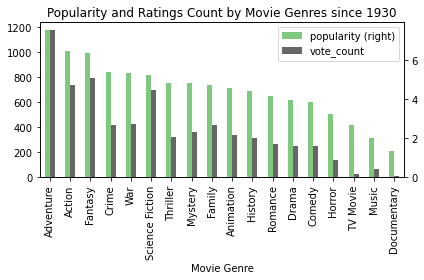

In [16]:
#populate bar graph to show the trend
table2.plot(secondary_y='popularity', colormap = 'Accent', title="Popularity and Ratings Count by Movie Genres since 1930", xlabel="Movie Genre",kind='bar')
plt.tight_layout()
plt.savefig("Popularity+votecount vs Movie Genre.pdf")

In [17]:
#dataframe for past 2012-2017 years of data
newtmdbmovie2012=newtmdbmovie.drop(newtmdbmovie[(newtmdbmovie['release_year'] < 2012) | (newtmdbmovie['release_year'] > 2017)].index,inplace=False)
newtmdbmovie2012['release_year'].max()

2017

In [141]:
#groupby another chart to display past 2012-2017 years of information
newtmdbmovie2012gb=newtmdbmovie2012.groupby('genre_names')['popularity'].mean().sort_values(ascending=False)
newtmdbmovie2012gb

genre_names
Adventure          7.086685
Action             6.382328
Fantasy            5.798308
War                5.278303
Crime              5.070875
Science Fiction    4.856914
Thriller           4.552918
Mystery            4.436731
Family             4.280065
History            4.193247
Animation          4.181243
Romance            3.897124
Drama              3.792078
Comedy             3.608738
Horror             2.980426
TV Movie           2.467446
Music              1.947993
Documentary        1.284023
Name: popularity, dtype: float64

<AxesSubplot:label='7fcf255b-d874-4a79-8665-326e1e98734a'>

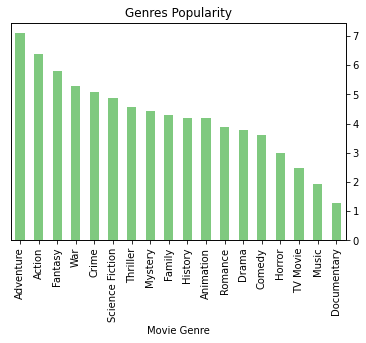

In [145]:
#populate the bar graph to display the trend in 2012-2017
newtmdbmovie2012gb.plot(secondary_y='popularity', colormap = 'Accent',title="Genres Popularity", xlabel="Movie Genre",kind='bar')
#plt.tight_layout()
#plt.savefig("Popularity+votecount vs Movie Genre past 10 years.pdf")

###### Populate chart for top 5 popular genres

In [148]:
#obtaining the top five popular genres for trend analytsis 
table5=newtmdbmovie2012gb.reset_index()
top5popgenres=table5['genre_names'].unique()
top5popgenres=top5popgenres[0:5]
top5popgenres

array(['Adventure', 'Action', 'Fantasy', 'War', 'Crime'], dtype=object)

Text(0.5, 1.0, 'Top 5 Genres Popularity Trend')

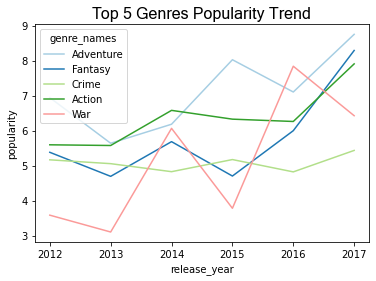

In [149]:
#linechart of popularity trend in past 10 years
#groupby another chart to display past 10 years information

table3tenyears=newtmdbmovie2012.groupby(['genre_names','release_year']).mean().sort_values(by = 'popularity',ascending = False).sort_values(by = 'release_year',ascending = False)
table3tenyears=table3tenyears.reset_index()

graphdf=table3tenyears.loc[table3tenyears['genre_names'].isin(top5popgenres)]

sns.lineplot(x = 'release_year', y='popularity', hue = 'genre_names', data = graphdf,palette='Paired').set_title('Top 5 Genres Popularity Trend',fontsize=16, fontname="Microsoft Sans Serif")

#plt.tight_layout()
#plt.savefig("Popularity & Votecount vs Movie Genre.pdf")

##Boxplot for Overall Ratings vs movie genres (not used in presentation)

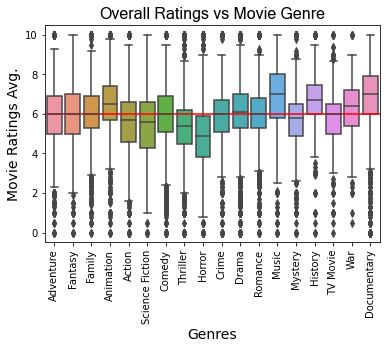

<Figure size 432x288 with 0 Axes>

In [150]:
#general ratings of the genres - in boxplot 
fig, axs = plt.subplots()
y2=newtmdbmovie['vote_average'].median()
sns.boxplot(x = 'genre_names', y='vote_average', data = newtmdbmovie, orient = 'v', ax = None)
plt.axhline(y2, c='r')
plt.xticks(rotation=90)

axs.set_title('Overall Ratings vs Movie Genre',fontsize=16, fontname="Microsoft Sans Serif")
axs.set_xlabel('Genres', fontsize=14)
axs.set_ylabel('Movie Ratings Avg.', fontsize=14)

plt.show()

plt.tight_layout()
plt.savefig("Overall Ratings vs Movie Genre.pdf")

## Movie release per month

In [151]:
#create a new column to show the month of the release date of each movie in the recommended genres - Action and Adventure
release_month = pd.DatetimeIndex(newtmdbmovie['release_date']).month
newtmdbmovie['release_month']=release_month
newtmdbmovie

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names,release_month
0,0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure,11
0,0,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Fantasy,11
0,0,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Family,11
1,1,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy,3
1,1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Adventure,3
...,...,...,...,...,...,...,...,...,...,...,...,...
26515,26515,10751,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Family,6
26515,26515,12,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Adventure,6
26515,26515,28,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Action,6
26516,26516,53,309885,en,The Church,0.600,2018-10-05,The Church,0.0,1,Thriller,10


In [25]:
recommendgenres=['Adventure','Fantasy']
newtmdbmovierecommend=newtmdbmovie[newtmdbmovie['genre_names'].isin(recommendgenres)]
newtmdbmovierecommend=newtmdbmovierecommend.loc[:,['genre_names','release_month']]
newtmdbmovierecommend=newtmdbmovierecommend.groupby(['release_month','genre_names'])['genre_names'].count().reset_index(name="count")
newtmdbmovierecommend

,release_month,genre_names,count
0,1,Adventure,141
1,1,Fantasy,88
2,2,Adventure,109
3,2,Fantasy,76
4,3,Adventure,112
5,3,Fantasy,95
6,4,Adventure,106
7,4,Fantasy,80
8,5,Adventure,109
9,5,Fantasy,90


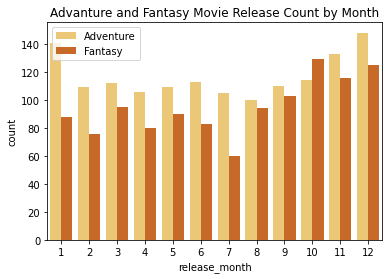

In [26]:
sns.barplot(data=newtmdbmovierecommend,x='release_month',y = 'count',palette='YlOrBr',hue='genre_names').set(title="Advanture and Fantasy Movie Release Count by Month")
plt.legend(loc='upper left')

## IMdb Data Extraction - SQL

In [27]:
rtreviews=pd.read_table("/Users/Shen/Documents/Flatiron/Project_1/dsc-phase-1-project-template/zippedData/rt.reviews.tsv", encoding="unicode_escape")

In [28]:
conn=sqlite3.connect("/Users/Shen/Documents/Flatiron/Project_1/dsc-phase-1-project-template/zippedData/im.db")
pd.read_sql("""SELECT * FROM sqlite_master;""",conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [29]:
#glossory of pdmovie tables SQL
pdmoviebasics=pd.read_sql("""SELECT * FROM movie_basics""",conn)
pdmoviedirectors=pd.read_sql("""SELECT * FROM directors""",conn)
pdmovieknownfor=pd.read_sql("""SELECT * FROM known_for""",conn)
pdmovie_akas=pd.read_sql("""SELECT * FROM movie_akas""",conn)
pdmovie_ratings=pd.read_sql("""SELECT * FROM movie_ratings""",conn)
pdmovie_persons=pd.read_sql("""SELECT * FROM persons""",conn)
pdmovie_principals=pd.read_sql("""SELECT * FROM principals""",conn)
pdmovie_writers=pd.read_sql("""SELECT * FROM writers""",conn)

In [152]:
#reformat im.db datat to merge all tables into one:
#join directors data into movie basics by change person_id to name dir_id 
#left - bascis and right directors
#new column is called pdmoviebasicsdir
pdmoviebasicsdir=pdmoviebasics.merge(pdmoviedirectors,on='movie_id',how='left')
pdmoviebasicsdir=pdmoviebasicsdir.rename(columns={"person_id":"dir_id"})
pdmoviebasicsdir

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,dir_id
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411
...,...,...,...,...,...,...,...
296896,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,nm10538612
296897,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm9272490
296898,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm8349149
296899,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm9272490


In [31]:
#adding movieknown to pdmoviebasicsdir to show what movies the dirs are known for
pdmovieknownfor=pdmovieknownfor.rename(columns={"person_id":"dir_id","movie_id":"known_for_movie"})
pdmoviebasicsdir=pdmoviebasicsdir.merge(pdmovieknownfor,on="dir_id",how='left')

In [32]:
pdmovie_akas
pdmovieknownfor=pdmovieknownfor.rename(columns={"person_id":"dir_id","movie_id":"known_for_movie"})
pdmoviebasicsdir=pdmoviebasicsdir.merge(pdmovieknownfor,on="dir_id",how='left')

## Data cleaning - explode genre names + merge files

In [33]:
#final list for pdmovie basics- pdmoviebasicsmaster
pdmoviebasicsmaster=pdmoviebasicsdir.merge(pdmovie_ratings,on="movie_id",how='left')
pdmoviebasicsmaster=pdmoviebasicsmaster.drop('known_for_movie_x',axis=1)
pdmoviebasicsmaster=pdmoviebasicsmaster.drop('known_for_movie_y',axis=1)
pdmoviebasicsmaster=pdmoviebasicsmaster.drop_duplicates()
pdmoviebasicsmaster['genres']

0            Action,Crime,Drama
64              Biography,Drama
80                        Drama
112                Comedy,Drama
128        Comedy,Drama,Fantasy
                   ...         
3716064             Documentary
3716112                  Comedy
3716113                    None
3716114             Documentary
3716130             Documentary
Name: genres, Length: 169262, dtype: object

In [38]:
pdmoviebasicsmaster.dropna(subset=['genres'],inplace=True)
pdmoviebasicsmaster['genres']

0            [Action, Crime, Drama]
64               [Biography, Drama]
80                          [Drama]
112                 [Comedy, Drama]
128        [Comedy, Drama, Fantasy]
                     ...           
3716048               [Documentary]
3716064               [Documentary]
3716112                    [Comedy]
3716114               [Documentary]
3716130               [Documentary]
Name: genres, Length: 163287, dtype: object

In [123]:
pdmoviebasicsmaster['genres']=pdmoviebasicsmaster['genres'].apply(lambda x : x.split(','))

In [153]:
pdmoviebasicsmaster=pdmoviebasicsmaster.explode('genres')
pdmoviebasicsmaster

,movie_id_x,primary_title,original_title,start_year,runtime_minutes,genres,dir_id,averagerating,numvotes,movie_id_y,ordering,category,job,characters,primary_name,birth_year,death_year,primary_profession,writer_id
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,nm0712540,7.0,77.0,tt0063540,5.0,director,None,None,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",nm0023551
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,nm0712540,7.0,77.0,tt0063540,5.0,director,None,None,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",nm1194313
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,nm0712540,7.0,77.0,tt0063540,5.0,director,None,None,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",nm0347899
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,nm0712540,7.0,77.0,tt0063540,5.0,director,None,None,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",nm1391276
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,nm0712540,7.0,77.0,tt0063540,5.0,director,None,None,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",nm0023551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731660,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm8349149,NaN,NaN,tt7378802,6.0,director,None,None,Vinicius Augusto Bozzo,1985.0,NaN,"writer,editor,director",nm9272490
3731661,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm8349149,NaN,NaN,tt9916622,8.0,cinematographer,director of photography,None,Vinicius Augusto Bozzo,1985.0,NaN,"writer,editor,director",nm9272490
3731662,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm8349149,NaN,NaN,tt9916622,8.0,cinematographer,director of photography,None,Vinicius Augusto Bozzo,1985.0,NaN,"writer,editor,director",nm9272490
3731663,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm8349149,NaN,NaN,tt9916622,8.0,cinematographer,director of photography,None,Vinicius Augusto Bozzo,1985.0,NaN,"writer,editor,director",nm9272491


In [42]:
pdmovie_principals=pdmovie_principals.merge(pdmovie_persons,on="person_id",how='left')

In [43]:
#final list for all writer and dir info - pdmoviewriterprincipal
pdmovie_writers=pdmovie_writers.rename(columns={"person_id":"writer_id"})
pdmoviewriterprincipal=pdmovie_principals.merge(pdmovie_writers,on="movie_id",how='left').rename(columns={"person_id":"dir_id"})

In [44]:
pdmoviebasicsmaster=pdmoviebasicsmaster.merge(pdmoviewriterprincipal, how='left' ,on='dir_id')


## Groupby tables - find top dirs for Adventure and Fantasy

In [45]:
pdmoviedir=pdmoviebasicsmaster.groupby(['genres','dir_id','primary_name'])['averagerating','numvotes'].mean()
pdmoviedir

<ipython-input-45-b7b06a0462ab>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pdmoviedir=pdmoviebasicsmaster.groupby(['genres','dir_id','primary_name'])['averagerating','numvotes'].mean()


averagerating       numvotes
genres  dir_id    primary_name                                    
Action  nm0000108 Luc Besson                   6.40  187159.666667
        nm0000110 Kenneth Branagh              6.60  399088.500000
        nm0000116 James Cameron                 NaN            NaN
        nm0000142 Clint Eastwood               7.30  401915.000000
        nm0000165 Ron Howard                   7.05  216821.500000
...                                             ...            ...
Western nm9484846 John Law                     5.80      29.000000
        nm9498506 Robert Lundahl                NaN            NaN
        nm9567079 Craig Hard                    NaN            NaN
        nm9574121 Aykan Yucel Irwins            NaN            NaN
        nm9724526 Paolo Treviso                 NaN            NaN

[211393 rows x 2 columns]

In [46]:
x=pdmoviedir.reset_index()
x

,genres,dir_id,primary_name,averagerating,numvotes
0,Action,nm0000108,Luc Besson,6.40,187159.666667
1,Action,nm0000110,Kenneth Branagh,6.60,399088.500000
2,Action,nm0000116,James Cameron,NaN,NaN
3,Action,nm0000142,Clint Eastwood,7.30,401915.000000
4,Action,nm0000165,Ron Howard,7.05,216821.500000
...,...,...,...,...,...
211388,Western,nm9484846,John Law,5.80,29.000000
211389,Western,nm9498506,Robert Lundahl,NaN,NaN
211390,Western,nm9567079,Craig Hard,NaN,NaN
211391,Western,nm9574121,Aykan Yucel Irwins,NaN,NaN


In [47]:
x[x['genres'] =='Fantasy']

,genres,dir_id,primary_name,averagerating,numvotes
151373,Fantasy,nm0000095,Woody Allen,7.70,356500.0
151374,Fantasy,nm0000108,Luc Besson,6.40,79142.5
151375,Fantasy,nm0000110,Kenneth Branagh,6.95,413028.0
151376,Fantasy,nm0000116,James Cameron,NaN,NaN
151377,Fantasy,nm0000142,Clint Eastwood,6.50,87288.0
...,...,...,...,...,...
155031,Fantasy,nm9923703,Carmine Cristallo Scalzi,NaN,NaN
155032,Fantasy,nm9960914,Haeju O,NaN,NaN
155033,Fantasy,nm9968123,Eulàlia Xalabarder Voltas,NaN,NaN
155034,Fantasy,nm9978357,Tim Goodfellow,NaN,NaN


In [105]:
xFantasy=x.loc[x['genres']=='Fantasy']
xFantasy=xFantasy.dropna()
xFantasynumvotes=xFantasy.sort_values(by=['numvotes','averagerating'],ascending=False)
Fantasydata=xFantasynumvotes.head(10)
Fantasydata=Fantasydata.sort_values(by=['averagerating'],ascending=False)
Fantasydata

,genres,dir_id,primary_name,averagerating,numvotes
151424,Fantasy,nm0009190,J.J. Abrams,8.000,784780.000000
151387,Fantasy,nm0000487,Ang Lee,7.900,535836.000000
151397,Fantasy,nm0001392,Peter Jackson,7.700,574604.333333
151557,Fantasy,nm0220600,Scott Derrickson,7.500,514510.000000
151679,Fantasy,nm0420941,Patty Jenkins,7.500,487527.000000
152028,Fantasy,nm0946734,David Yates,7.425,411467.250000
151681,Fantasy,nm0426059,Rian Johnson,7.100,462903.000000
151375,Fantasy,nm0000110,Kenneth Branagh,6.950,413028.000000
151978,Fantasy,nm0851930,Alan Taylor,6.900,540996.000000
151774,Fantasy,nm0532235,Seth MacFarlane,6.900,538367.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'J.J. Abrams'),
  Text(1, 0, 'Ang Lee'),
  Text(2, 0, 'Peter Jackson'),
  Text(3, 0, 'Scott Derrickson'),
  Text(4, 0, 'Patty Jenkins'),
  Text(5, 0, 'David Yates'),
  Text(6, 0, 'Rian Johnson'),
  Text(7, 0, 'Kenneth Branagh'),
  Text(8, 0, 'Alan Taylor'),
  Text(9, 0, 'Seth MacFarlane')])

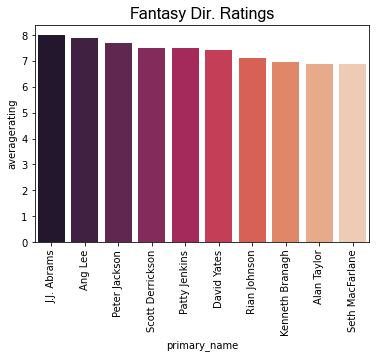

In [126]:
sns.barplot(data=Fantasydata, x='primary_name', y='averagerating',palette='rocket').set_title('Fantasy Dir. Ratings',fontsize=16, fontname="Microsoft Sans Serif")
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Christopher Nolan'),
  Text(1, 0, 'Anthony Russo'),
  Text(2, 0, 'Joe Russo'),
  Text(3, 0, 'Tim Miller'),
  Text(4, 0, 'Alejandro G. Iñárritu'),
  Text(5, 0, 'James Gunn'),
  Text(6, 0, 'J.J. Abrams'),
  Text(7, 0, 'Joss Whedon'),
  Text(8, 0, 'Gary Ross'),
  Text(9, 0, 'Kenneth Branagh')])

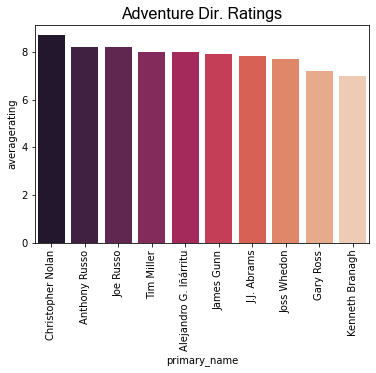

In [132]:
xAdventure=x.loc[x['genres']=='Adventure']
xAdventure=xAdventure.dropna()
xAdvnumvotes=xAdventure.sort_values(by=['numvotes','averagerating'],ascending=False)
Adventuredata= xAdvnumvotes.head(10)
Adventuredata=Adventuredata.sort_values(by=['averagerating'],ascending=False)
sns.barplot(data=Adventuredata, x='primary_name', y='averagerating',palette='rocket').set_title('Adventure Dir. Ratings',fontsize=16, fontname="Microsoft Sans Serif")
plt.xticks(rotation=90)